In [2]:
import pandas as pd

In [34]:
customer_data = pd.read_csv("customer_data.csv")
customer_data.columns

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner',
       'partner_value', 'dependents', 'dependents_value', 'phone_service',
       'internet_service', 'contract_type', 'payment_type', 'monthly_charges',
       'total_charges', 'churn', 'tenure', 'is_female', 'has_churned',
       'has_phone', 'has_phone_num', 'has_internet', 'has_internet_num',
       'has_phone_and_internet', 'service_type', 'partner_dependents',
       'start_date', 'average_monthly_charges', 'matches_monthly_charges',
       'phone_service_desc', 'internet_service_desc', 'contract_desc'],
      dtype='object')

has_churned
False    2220
True     1655
Name: customer_id, dtype: int64


<AxesSubplot:xlabel='has_churned'>

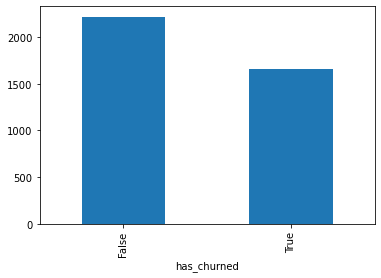

In [32]:
month_to_month = customer_data[customer_data.contract_desc == "Month-to-Month"]
month_to_month.shape
print(month_to_month.groupby("has_churned").customer_id.count())
month_to_month.groupby("has_churned").customer_id.count().plot.bar()

### Is there any relationship between churn and phone service?

phone_service_desc
No Phone Service     153
Two or More Lines    722
One Line             780
Name: has_churned, dtype: int64


<AxesSubplot:ylabel='phone_service_desc'>

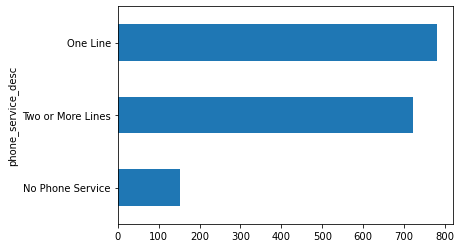

In [28]:
phone_service_churn = month_to_month.groupby("phone_service_desc").has_churned.sum()
print(phone_service_churn.sort_values())
phone_service_churn.sort_values().plot.barh()

#### There seems to be very little difference between multiple line and single line customers when it comes to churn.

### Is there any relationship between churn and type of internet service?

internet_service_desc
No Internet Service      99
DSL                     394
Fiber Optic            1162
Name: has_churned, dtype: int64


<AxesSubplot:ylabel='internet_service_desc'>

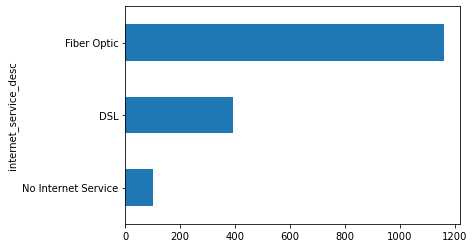

In [27]:
internet_service_churn = month_to_month.groupby("internet_service_desc").has_churned.sum()
print(internet_service_churn.sort_values())
internet_service_churn.sort_values().plot.barh()

#### Much more fiber customers churn than any other category

### How much do fiber customers pay monthly compared to DSL or no internet customers?

In [7]:
month_to_month['float_charges'] = month_to_month.monthly_charges.str.replace("$", "").astype(float)

<ipython-input-7-c67a2e6f729e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_to_month['float_charges'] = month_to_month.monthly_charges.str.replace("$", "").astype(float)


In [8]:
internet_charges = month_to_month.groupby("internet_service_desc").float_charges.agg("mean")
internet_charges

internet_service_desc
DSL                    50.219501
Fiber Optic            87.021194
No Internet Service    20.409542
Name: float_charges, dtype: float64

#### There is nearly a $40 difference in monthly charges for fiber customers

### Who makes up month-to-month fiber customers that have churned?

In [9]:
fiber_customers = month_to_month[month_to_month.internet_service_desc == "Fiber Optic"]
fiber_customers.shape

(2128, 31)

In [10]:
churned_fiber_customers = fiber_customers[fiber_customers.has_churned]
churned_fiber_customers.shape

(1162, 31)

gender
Female    599
Male      563
Name: customer_id, dtype: int64


<AxesSubplot:xlabel='gender'>

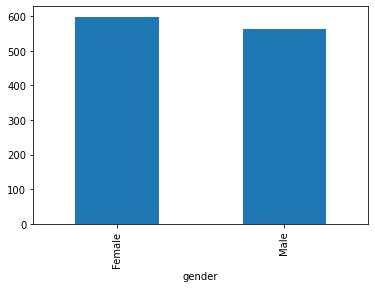

In [26]:
print(churned_fiber_customers.groupby("gender").customer_id.count())
churned_fiber_customers.groupby("gender").customer_id.count().plot.bar()

is_senior_citizen
0    794
1    368
Name: customer_id, dtype: int64


<AxesSubplot:xlabel='is_senior_citizen'>

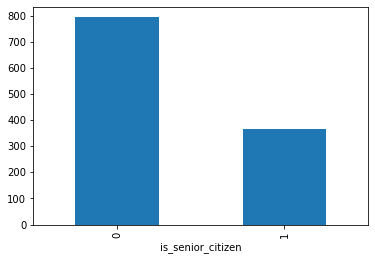

In [25]:
print(churned_fiber_customers.groupby("is_senior_citizen").customer_id.count())
churned_fiber_customers.groupby("is_senior_citizen").customer_id.count().plot.bar()

partner
No     744
Yes    418
Name: customer_id, dtype: int64


<AxesSubplot:xlabel='partner'>

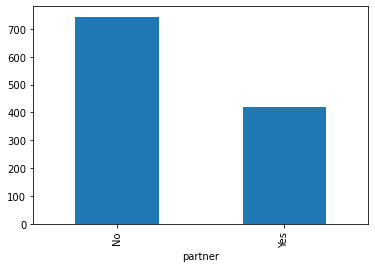

In [24]:
print(churned_fiber_customers.groupby("partner").customer_id.count())
churned_fiber_customers.groupby("partner").customer_id.count().plot.bar()

dependents
No     997
Yes    165
Name: customer_id, dtype: int64


<AxesSubplot:xlabel='dependents'>

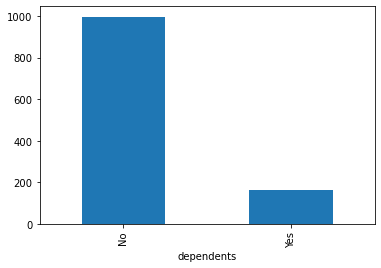

In [23]:
print(churned_fiber_customers.groupby("dependents").customer_id.count())
churned_fiber_customers.groupby("dependents").customer_id.count().plot.bar()

#### Seems like single (No partner) and young (not senior, no dependents) people are the fiber customers that churn the most. 

### How much money was lost from churned customers in this demographic?

In [ ]:
young_singles = churned_fiber_customers[(churned_fiber_customers.is_senior_citizen == False) & (churned_fiber_customers.dependents == "No") & (churned_fiber_customers.dependents == "No")]

In [21]:
young_singles['float_total_charges'] = young_singles.total_charges.str.replace("$", "").str.replace(",", "_").astype(float)

<ipython-input-21-c74086503b67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_singles['float_total_charges'] = young_singles.total_charges.str.replace("$", "").str.replace(",", "_").astype(float)


In [36]:
young_singles[['float_charges', 'float_total_charges']].sum()

float_charges           55226.95
float_total_charges    822114.70
dtype: float64

#### Giving up 55227 a month. Gave up 822115 in total charges from churned fiber customers in this demographic.

### Churned customers overall?

In [38]:
churned_fiber_customers['float_total_charges'] = churned_fiber_customers.total_charges.str.replace("$", "").str.replace(",", "_").astype(float)

<ipython-input-38-2bc439737000>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_fiber_customers['float_total_charges'] = churned_fiber_customers.total_charges.str.replace("$", "").str.replace(",", "_").astype(float)


In [39]:
churned_fiber_customers[['float_charges', 'float_total_charges']].sum()

float_charges           100482.0
float_total_charges    1731652.5
dtype: float64